# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By John Yoak

## What does a Simple Linear Regression Model do?
#### A simple regression model predicts an unknown value (i.e., a "dependent variable") based on the values of one or more known values (i.e., "independent variables").


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds')

In [3]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The r-value measures whether (and how strongly) a pair of numeric values are linearly correlated.
* The r-value's possible range of values is -1 to 1.
* R-values that indicate positive correlations are positive, i.e., (0,1].
* R-values that indicate negative correlations are negative, i.e., [-1,0).
* The r-values that indicates no correlation is exactly 0.

In [4]:
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

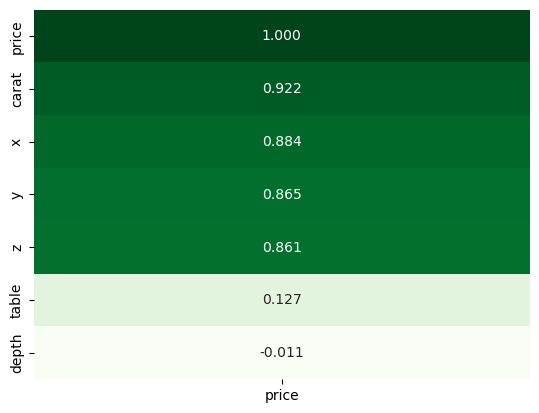

In [5]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the data into the training and test datasets
2. Create the model from the training dataset
3. Validate the model with the test dataset
4. Use the model to make predictions

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], 
    test_size=0.3, random_state=20)

In [8]:
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.score(x_test, y_test)

0.8504107786474794

In [11]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
predicted = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
df = pd.DataFrame(combined)
df2 = df[['carat','price','predicted_price']]
df2.head(5)

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [14]:
melted = pd.melt(combined, id_vars=['carat'],
                 value_vars=['price', 'predicted_price'],
                 var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


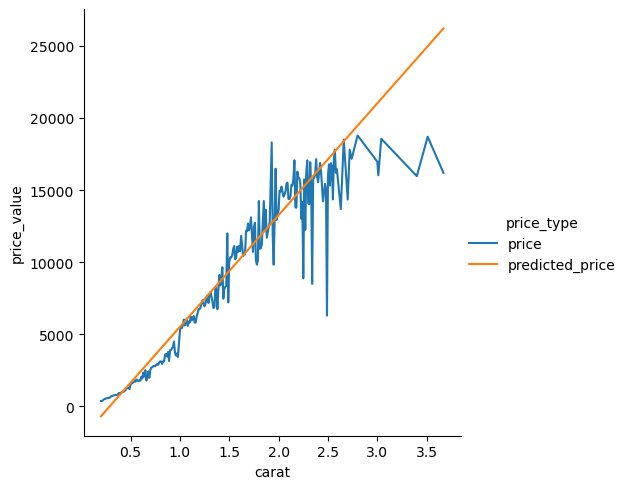

In [15]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value',
            hue='price_type', ci=False)

## Regression line equation is y = mx + b, where...
* y is the <b>dependent</b> variable
* m is the <b>slope</b> of the line
* x is the <b>independent</b> variable
* b is the <b>Y-intercept</b>

In [16]:
x = data.carat.values.reshape(-1,1)
y = data.price

In [17]:
lr = LinearRegression()
predicted2 = lr.fit(x,y)

In [18]:
m = predicted2.coef_
b = predicted2.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453984


In [19]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800453984


In [20]:
test_price1 = (0.7*m)+b
print('The predicted price for a 0.70 '+
      'carat diamond is $%.2f' % test_price1)

The predicted price for a 0.70 carat diamond is $3173.14


In [21]:
test_price2 = (0.54*m)+b
print('The predicted price for a 0.54 carat diamond ' +
      'is $%.2f' % test_price2)

The predicted price for a 0.54 carat diamond is $1932.11


In [22]:
print('Yes, the estimated price (based on the regression ' +
      'line equation) and the predicted price (based on Step ' +
      '18) are close. The differential (predicted minus ' +
      'estimated) for the 0.70 carat diamond is $7.84 and the ' +
      'differential for the 0.54 diamond is $7.96.')

Yes, the estimated price (based on the regression line equation) and the predicted price (based on Step 18) are close. The differential (predicted minus estimated) for the 0.70 carat diamond is $7.84 and the differential for the 0.54 diamond is $7.96.
